# Case Study 1: From Exploration to Design

- Name: Ziqi Zhou
- Student ID: 14681936
- Link to GitHub Repository: 

This blank notebook is provided for you to use to answer questions from [Case Study 1](https://ubc-dsci.github.io/dsci-200/case-studies/case-study-1.html). 

In [23]:
install.packages('tidyverse')
devtools::install_github("lbelzile/hecedsm")
library(tidyverse)
library(hecedsm)
data(BRLS21_EDA)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'hecedsm' from a github remote, the SHA1 (df0a5444) has not changed since last install.
  Use `force = TRUE` to force installation



In [24]:
glimpse(BRLS21_EDA)
head(BRLS21_EDA)

Rows: 10,942
Columns: 6
$ id        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ reltime   <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ task      <fct> baseline, baseline, baseline, baseline, baseline, baseline, …
$ occurence <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ eda       <dbl> 20.60959, 21.41062, 22.26244, 24.22100, 24.23851, 23.63703, …
$ hr        <dbl> 88.49560, 88.31564, 78.13892, 65.82009, 65.13290, 66.83456, …


id reltime task     occurence eda      hr      
1 1  0       baseline 1         20.60959 88.49560
2 1  1       baseline 1         21.41062 88.31564
3 1  2       baseline 1         22.26244 78.13892
4 1  3       baseline 1         24.22100 65.82009
5 1  4       baseline 1         24.23851 65.13290
6 1  5       baseline 1         23.63703 66.83456

# Milestone 1

# Task 1: Choose your favourite dataset

## Selected Study

For this case study, I selected the study **“Smartwatches are more distracting than mobile phones while driving: Results from an experimental study”** by Brodeur et al. (2021). This study investigates how different notification systems influence driver distraction and safety.


## Study Goals Summary

This study examines how different notification systems affect driver distraction, with a particular focus on smartwatches. As wearable technology becomes more common, it is important to understand how these devices influence driver attention and road safety.

The primary objective of the study is to compare the level of distraction caused by smartwatches, smartphones, speakers (voice notifications), and texting while driving. The researchers aim to determine whether smartwatches are more distracting than smartphones and other notification methods. They also explore differences between receiving and replying to messages using text versus voice.

This research is important because distracted driving is a major cause of traffic accidents, and current laws often regulate mobile phone use but do not specifically address smartwatch use. Understanding the risks of newer technologies can help inform public awareness and safety regulations.

The authors hypothesize that smartwatch use would result in greater distraction than smartphone use, and that voice-based communication would be less distracting than visual or text-based interactions.


# Task 2: Explore data

In [25]:
glimpse(BRLS21_EDA)

Rows: 10,942
Columns: 6
$ id        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ reltime   <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ task      <fct> baseline, baseline, baseline, baseline, baseline, baseline, …
$ occurence <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ eda       <dbl> 20.60959, 21.41062, 22.26244, 24.22100, 24.23851, 23.63703, …
$ hr        <dbl> 88.49560, 88.31564, 78.13892, 65.82009, 65.13290, 66.83456, …


## Q3
The dataset contains **10,942 observations** and **6 variables**

## Q4
- id: categorical(factor)
- reltime: numerical(integer)
- task: categorical(factor)
- occurence: numerical(integer)
- eda: numerical(double)
- hr: numerical(double)

## Q5
Most variables are already stored in appropriate formats.  
The variables **id** and **task** are correctly stored as categorical variables.  

The variable **occurence** is numeric but appears to represent event counts rather than continuous measurements. Depending on the analysis, it could be treated as either numeric or categorical. However, for exploratory analysis, no immediate conversion is required.

## Q6

In [26]:
colSums(is.na(BRLS21_EDA))

id   reltime      task occurence       eda        hr 
        0         0         0         0       214       538

There are some missing values in the dataset.  
The variables **eda** and **hr** contain missing values, with 214 and 538 missing observations respectively.  

Given the total number of observations (10,942), these missing values represent a small proportion of the data (less than 5%). Therefore, they are unlikely to strongly affect exploratory analysis, but they should be considered in later analyses.

## Q7

In [27]:
table(BRLS21_EDA$task)


 baseline      cell voicecall     watch 
     2736      3028      1392      3786 

The categorical variable **task** shows some differences in the number of observations across categories. The "watch" condition has the highest number of observations (3,786), while "voicecall" has the fewest (1,392).

Although the group sizes are not equal, no single category dominates the dataset. Therefore, there is no severe class imbalance. The distribution is reasonably balanced for exploratory analysis.

# Task 3: Data visualization

In this part, I select 8，9，and 10

## Q8

I selected **EDA (electrodermal activity)** and **heart rate (HR)** as two numerical variables.  
A scatter plot is appropriate for exploring the relationship between two numerical variables because it shows how values vary together.

Warning message:
“Removed 739 rows containing missing values or values outside the scale range
(`geom_point()`).”


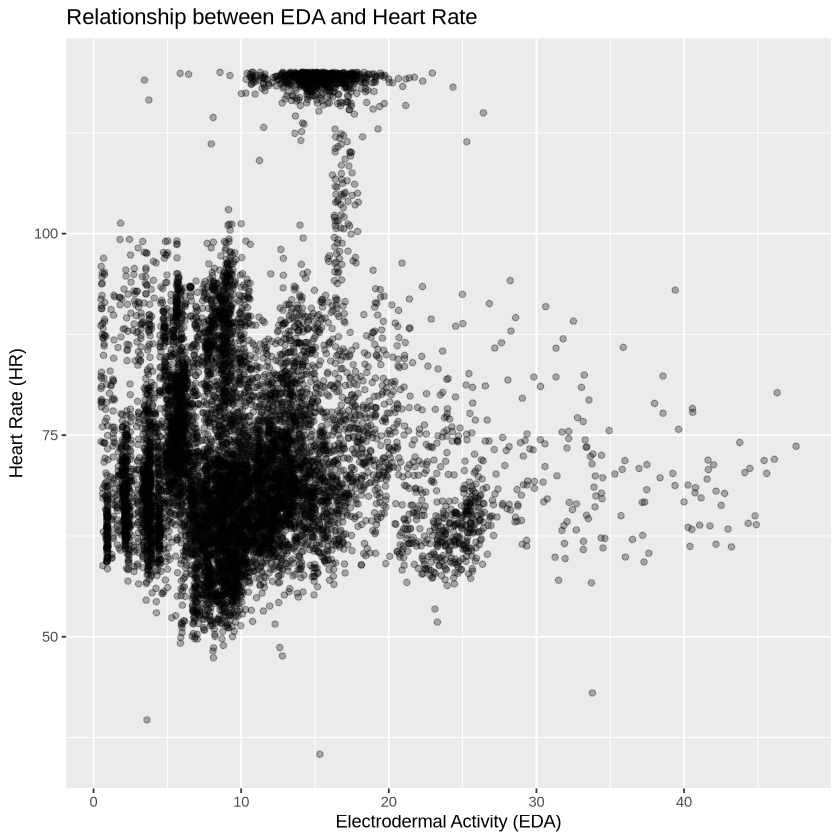

In [28]:
ggplot(BRLS21_EDA, aes(x = eda, y = hr)) +
  geom_point(alpha = 0.3) +
  labs(
    title = "Relationship between EDA and Heart Rate",
    x = "Electrodermal Activity (EDA)",
    y = "Heart Rate (HR)"
  )

The scatter plot shows a wide spread of points, indicating no strong linear relationship between EDA and heart rate. The points are scattered without a clear upward or downward trend.

Most observations are concentrated in moderate ranges of EDA and heart rate, suggesting typical physiological levels during the experiment. A few points appear at higher EDA levels, but these do not correspond to a consistent change in heart rate.


## Q9

I selected **heart rate (HR)** as a numerical variable.  
A histogram is appropriate for showing the distribution of a numerical variable.


Warning message:
“Removed 538 rows containing non-finite outside the scale range (`stat_bin()`).”


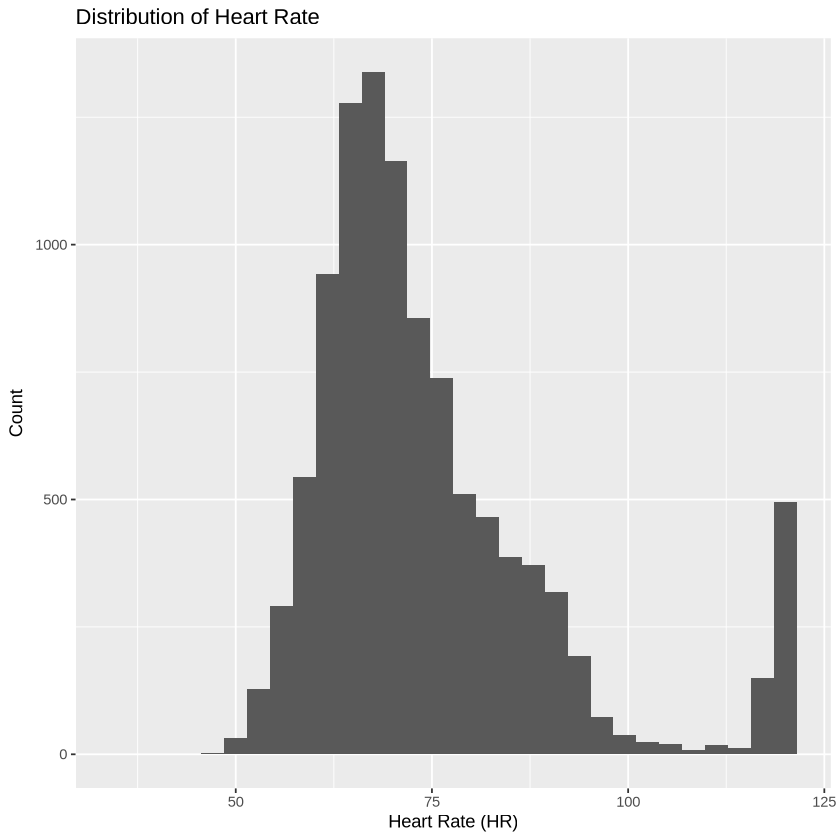

In [29]:
ggplot(BRLS21_EDA, aes(x = hr)) +
  geom_histogram(bins = 30) +
  labs(
    title = "Distribution of Heart Rate",
    x = "Heart Rate (HR)",
    y = "Count"
  )

The histogram shows that most heart rate values fall between 60 and 80 beats per minute, indicating this is a typical range for participants.

The distribution is slightly right-skewed, with fewer observations at higher heart rates. A small number of values appear near the upper end of the range, suggesting occasional higher physiological arousal. Overall, extreme heart rate values are relatively uncommon.


## Q10

I selected **heart rate (HR)** as a numerical variable and **task** as a categorical variable.  
A boxplot is appropriate because it compares numerical distributions across categories.

Warning message:
“Removed 538 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


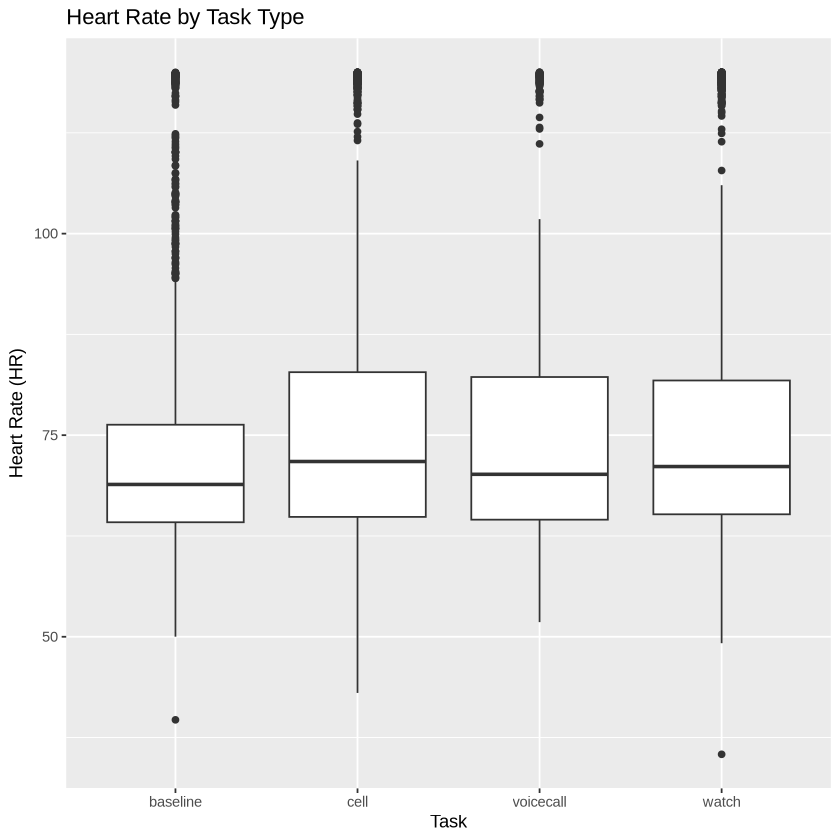

In [30]:
ggplot(BRLS21_EDA, aes(x = task, y = hr)) +
  geom_boxplot() +
  labs(
    title = "Heart Rate by Task Type",
    x = "Task",
    y = "Heart Rate (HR)"
  )


The boxplot compares heart rate across different task conditions. The median heart rate appears slightly lower in the baseline condition and slightly higher in the cell and watch conditions.

However, the distributions overlap considerably, suggesting that differences between task types are not very large. All task conditions show some high-value outliers, indicating occasional higher physiological arousal across tasks.

Overall, this suggests that while task type may be associated with small differences in heart rate, the effect is not dramatic.


# Task 4

In this task, I selected question 12 and 13.

## Q12

In [31]:
mean_hr <- mean(BRLS21_EDA$hr, na.rm = TRUE)
median_hr <- median(BRLS21_EDA$hr, na.rm = TRUE)

mean_hr
median_hr

[1] 74.63768

[1] 70.47726

I selected heart rate (HR) as a numerical variable. The mean heart rate is 74.64 bpm, while the median is 70.48 bpm.

Because the mean is higher than the median, the distribution appears slightly right-skewed. This suggests the presence of some higher heart rate values.

Therefore, the **median** is a more appropriate measure of central tendency, as it is less influenced by extreme values and better represents a typical observation.


## Q13

In [32]:
table(BRLS21_EDA$task)
prop.table(table(BRLS21_EDA$task))



 baseline      cell voicecall     watch 
     2736      3028      1392      3786 


 baseline      cell voicecall     watch 
0.2500457 0.2767319 0.1272162 0.3460062 

I selected the variable **task**, which represents different experimental conditions. A frequency table and proportions are appropriate summary statistics for categorical variables.

The watch condition has the highest proportion (34.6%), followed by cell (27.7%) and baseline (25.0%). The voicecall condition has the lowest proportion (12.7%).

Although the group sizes are not equal, no single category dominates the dataset. Reporting proportions helps us understand the relative representation of each task condition.

## Q15

### Research question

Does smartwatch use lead to higher physiological arousal (as measured by heart rate and EDA) compared to other task conditions?

## Q16


A train-test split is not necessary for this question because the goal is to explore and compare physiological responses across task conditions rather than build a predictive model.

The analysis focuses on understanding patterns and differences in the data, which falls under exploratory data analysis.

## Q17

In [33]:
avg_hr_task <- BRLS21_EDA %>%
  group_by(id, task) %>%
  summarize(avg_hr = mean(hr, na.rm = TRUE))

head(avg_hr_task)


`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


id task      avg_hr  
1 1  baseline  73.47913
2 2  baseline  80.67945
3 2  cell      84.92370
4 2  voicecall 83.63324
5 2  watch     84.34079
6 3  baseline  67.33110

A new feature was created by calculating the average heart rate for each participant in each task condition.

This feature is constructed by grouping the data by participant ID and task, then computing the mean heart rate. It is useful because it reduces noise from moment-to-moment fluctuations and provides a clearer summary of physiological response for each condition.

This makes it easier to compare physiological arousal across tasks.

# Milestone 2

## Task 6

## Q18

The authors are primarily addressing **causal** and **inferential** questions.  

They aim to determine whether different notification methods cause different levels of driver distraction and physiological response. Because the study uses an experimental design to compare conditions, the authors are making causal claims about how device type affects attention and driving behavior.


## Q19
The population of interest is drivers who use smart devices while driving.  

The sample consists of 31 participants who took part in a driving simulator experiment. These participants were observed under different notification conditions.

## Q20

This is a **controlled experiment**.  

The researchers actively manipulated the notification type and assigned participants to different conditions in a driving simulator. Because the researchers controlled the conditions, this is not an observational study.

## Task 7
In this part, I select question 21 and 22

## Q21
The researchers controlled for individual differences by using a within-subject design, where each participant experienced all conditions.  

This reduces the impact of confounding variables such as natural differences in attention or physiology between participants.


## Q22
The study likely used **convenience sampling**, where participants volunteered or were recruited based on availability.  

This method is common in laboratory experiments because it is practical and cost-effective.

# Task 8

If I were designing this study, I might include a larger and more diverse sample to improve generalizability. For example, including drivers of different ages and driving experience levels could provide more representative results.

However, the authors may have chosen a smaller convenience sample because simulator studies are time-consuming and expensive.  

While a larger sample would improve external validity, it would also increase cost and complexity. Therefore, the authors’ design is reasonable given practical constraints.